# Safeframe AI Evaluation

Contains sample user queries and code generated from Safeframe AI for Kaggle Titanic dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filepath = r"/kaggle/input/titanic/train.csv"

In [8]:
df = pd.read_csv(filepath)
df = df.dropna()

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


User Query 1: What percentage of passengers survived in each ticket class?

In [10]:
 df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    67.088608
2    80.000000
3    50.000000
Name: Survived, dtype: float64

User Query 2: Compute the Pearson correlation between Fare and Age.

In [11]:
df['Fare'].corr(df['Age'], method='pearson')

-0.09242385620999939

User Query 3: Which embarkation port had the lowest survival rate, and what was that rate?

In [12]:
df.groupby('Embarked')['Survived'].mean().sort_values().index[0], df.groupby('Embarked')['Survived'].mean().sort_values().iloc[0]

('Q', 0.5)

User Query 4: Add a FamilySize column (SibSp + Parch + 1) and list the 10 largest families by size.

In [14]:
 df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # create FamilySize column
df.nlargest(10, 'FamilySize') # list the 10 largest families by size

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.000,C23 C25 C27,S,6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.000,C23 C25 C27,S,6
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.000,C23 C25 C27,S,6
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.000,C23 C25 C27,S,6
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.375,B57 B59 B63 B66,C,5
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.375,B57 B59 B63 B66,C,5
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.000,F4,S,4
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.550,C22 C26,S,4
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.550,C22 C26,S,4
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.000,B96 B98,S,4


User Query 5: Show the top five passengers ranked by Fare divided by FamilySize, displaying Name and FarePerPerson.

In [15]:
 df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # calculate family size
df['FarePerPerson'] = df['Fare'] / df['FamilySize'] # calculate fare per person
df.sort_values(by='FarePerPerson', ascending=False)[['Name', 'FarePerPerson']].head(5) # sort and display top 5

,Name,FarePerPerson
737,"Lesurer, Mr. Gustave J",512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",256.1646
716,"Endres, Miss. Caroline Louise",227.5250
730,"Allen, Miss. Elisabeth Walton",211.3375
609,"Shutes, Miss. Elizabeth W",153.4625


User Query 6: Report the median Age for each combination of Sex and Passenger Class.

In [16]:
 df.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         34.0
        2         29.0
        3         24.0
male    1         40.0
        2         18.5
        3         25.0
Name: Age, dtype: float64

User Query 7: Create a bar chart of average Fare by passenger class.

<Axes: title={'center': 'Average Fare by Passenger Class'}, xlabel='Passenger Class', ylabel='Average Fare'>

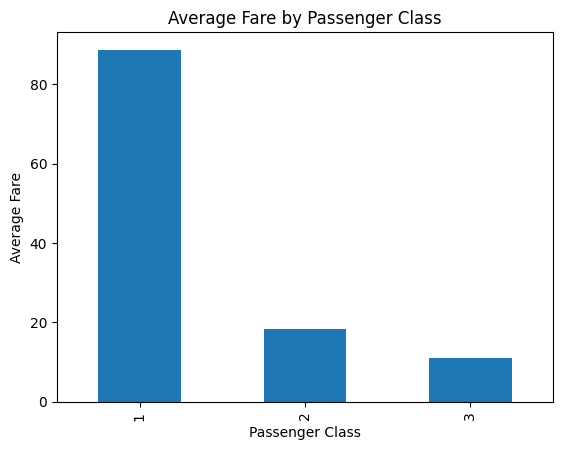

In [17]:
 df.groupby('Pclass')['Fare'].mean().plot(kind='bar', title='Average Fare by Passenger Class', xlabel='Passenger Class', ylabel='Average Fare')

User Query 8: Identify passengers whose Age value is missing and count how many there are.

In [20]:
 df['Age'].isnull().sum()

0

User Query 9: Plot overlapping histograms of Age for survivors versus non-survivors.

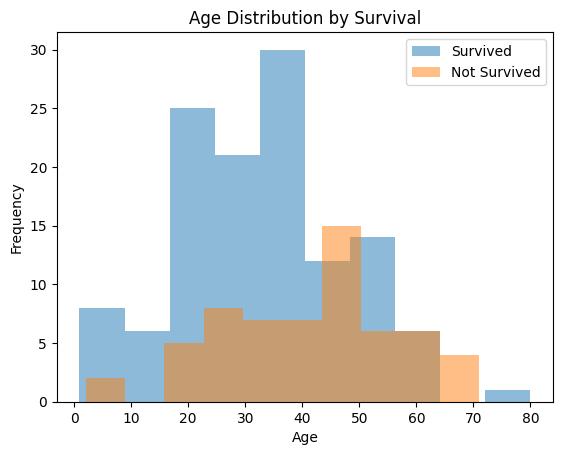

In [21]:
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), alpha=0.5, label='Survived')
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), alpha=0.5, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Survival')
plt.legend(loc='upper right')
plt.show()

User Query 10: Which cabin deck letter (first character of Cabin) has the highest average Fare?

In [22]:
df.dropna(subset=['Cabin']).groupby(df['Cabin'].str[0])['Fare'].mean().idxmax()

'B'

User Query 11: Bucket ages into decades and show the survival rate for each age bucket.

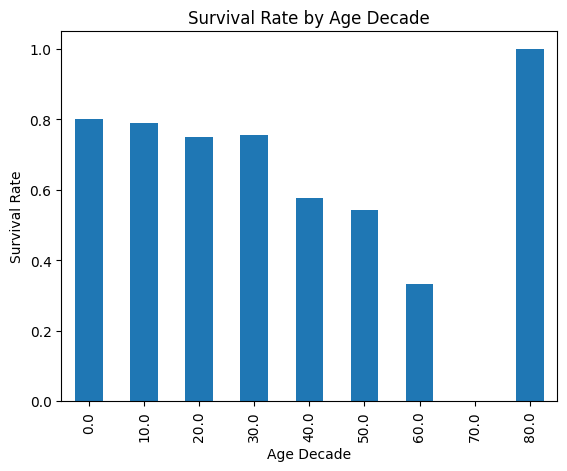

In [23]:
df['Age_Decade'] = (df['Age'] // 10) * 10 # create age decade column
df.groupby('Age_Decade')['Survived'].mean().plot(kind='bar') # plot survival rate by age decade
plt.title('Survival Rate by Age Decade')
plt.xlabel('Age Decade')
plt.ylabel('Survival Rate')
plt.show()

User Query 12: List the names of all passengers older than 70 and indicate whether they survived.

In [24]:
 df.loc[df['Age'] > 70, ['Name', 'Survived']]

,Name,Survived
96,"Goldschmidt, Mr. George B",0
630,"Barkworth, Mr. Algernon Henry Wilson",1


User Query 13: Create a Seaborn pair-plot of Fare, Age, and FamilySize coloured by survival outcome.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

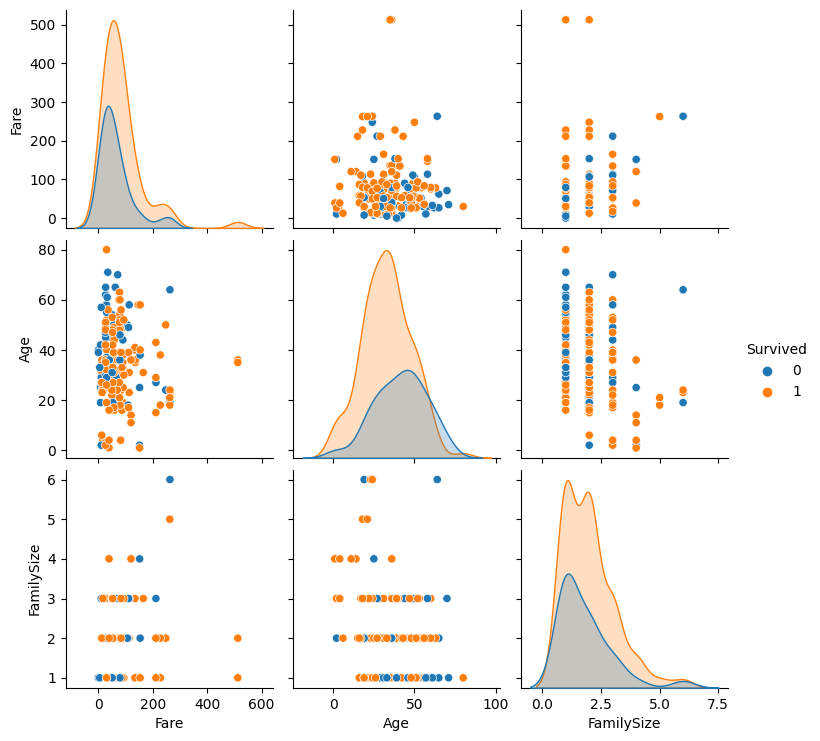

In [25]:
 import seaborn as sns
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # create FamilySize column
sns.pairplot(df[['Fare', 'Age', 'FamilySize', 'Survived']], hue='Survived') # create pairplot
plt.show() # show plot

User Query 14: Find the five passengers with the largest number of siblings/spouses aboard and show their survival status.

In [26]:
df.sort_values(by='SibSp', ascending=False)[['Name', 'Survived']].head(5)

,Name,Survived
27,"Fortune, Mr. Charles Alexander",0
341,"Fortune, Miss. Alice Elizabeth",1
88,"Fortune, Miss. Mabel Helen",1
571,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1
742,"Ryerson, Miss. Susan Parker ""Suzette""",1


User Query 15: Compute the average Fare for each embarkation port and plot it as a bar chart.

Text(0, 0.5, 'Average Fare')

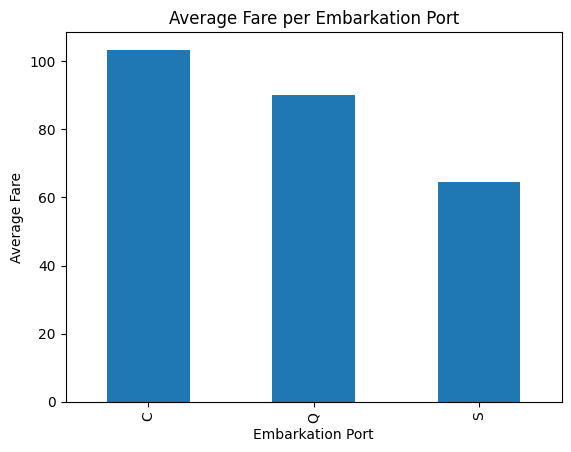

In [27]:
df.groupby('Embarked')['Fare'].mean().plot(kind='bar')
plt.title('Average Fare per Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Average Fare')